In [1]:
# The code was removed by Watson Studio for sharing.

In [2]:
## String
def load_string(fileobject):
    '''Load the file contents into a Python string'''
    text = fileobject.read()
    print(text)
    return text

text = load_string(streaming_body_3)

b'1547874030,2.6,1.4,0.0,95.9,0.02,8.3,1.3,43.86,347,0,101,0.73\r\n1547874060,2.6,1.7,0.0,95.7,0.02,8.7,1.2,47.08,348,0,101,0.73\r\n1547874090,49.2,13.0,0.0,37.8,0.40,160.0,5.7,47.77,455,9,101,0.77\r\n1547874120,2.7,1.9,0.0,95.3,0.02,9.3,1.4,49.00,380,0,101,0.73\r\n1547874150,2.6,1.6,0.0,95.7,0.02,8.7,1.4,48.13,356,0,101,0.73\r\n1547874180,11.1,6.0,0.0,82.9,0.07,29.2,1.9,48.72,446,1,101,0.76\r\n1547874210,5.2,2.1,0.0,92.6,0.03,13.5,1.5,48.29,354,0,101,0.75\r\n1547874240,6.2,3.2,0.0,90.6,0.04,16.6,1.6,47.71,352,1,101,0.75\r\n1547874270,4.6,2.8,0.0,92.6,0.03,13.7,1.4,45.78,366,0,101,0.75\r\n1547874300,2.7,1.7,0.0,95.5,0.02,8.9,1.2,48.49,341,0,101,0.74\r\n1547874330,58.7,3.3,0.0,38.0,0.57,228.9,7.7,48.03,717,12,101,0.77\r\n1547874360,49.4,12.7,0.0,37.9,0.38,151.6,5.5,47.34,402,10,101,0.77\r\n1547874390,2.5,1.5,0.0,96.0,0.02,8.4,1.3,47.93,380,0,101,0.73\r\n1547874420,6.4,2.1,0.0,91.4,0.04,15.2,1.5,48.12,337,0,101,0.75\r\n1547874450,18.6,6.1,0.0,75.3,0.11,42.5,2.3,46.89,508,2,101,0.76\r\n15

In [3]:
print(type(text))
df = pd.DataFrame()
for line in text.decode("utf-8").split('\n'):  ##The lines have 'b' at the beggining stating it is encoded to bytes, change to string
    fields = line.rstrip().split(",")  ## remove trailing '\r' at end of line
    tmp = [fields[0],fields[1],fields[2],fields[3],fields[4],fields[5],fields[6],fields[7],fields[8],fields[9],fields[10],fields[11],fields[12]]
    row = pd.Series(tmp)
    df = df.append([row], ignore_index=True)
    #print(line)

<class 'bytes'>


IndexError: list index out of range

In [4]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1547874030,2.6,1.4,0.0,95.9,0.02,8.3,1.3,43.86,347,0,101,0.73
1,1547874060,2.6,1.7,0.0,95.7,0.02,8.7,1.2,47.08,348,0,101,0.73
2,1547874090,49.2,13.0,0.0,37.8,0.40,160.0,5.7,47.77,455,9,101,0.77


In [5]:
column_names = ['timestamp','user','sys','wait','idle','physc','entc','lbusy','app','vcsw','phint','nsp','utcyc']
df.columns = column_names
df.head()

,timestamp,user,sys,wait,idle,physc,entc,lbusy,app,vcsw,phint,nsp,utcyc
0,1547874030,2.6,1.4,0.0,95.9,0.02,8.3,1.3,43.86,347,0,101,0.73
1,1547874060,2.6,1.7,0.0,95.7,0.02,8.7,1.2,47.08,348,0,101,0.73
2,1547874090,49.2,13.0,0.0,37.8,0.40,160.0,5.7,47.77,455,9,101,0.77
3,1547874120,2.7,1.9,0.0,95.3,0.02,9.3,1.4,49.00,380,0,101,0.73
4,1547874150,2.6,1.6,0.0,95.7,0.02,8.7,1.4,48.13,356,0,101,0.73


In [6]:
df['Date'] = pd.to_datetime(df['timestamp'], unit='s')

In [7]:
df_idx = df.set_index(["Date"], drop=True)
df_idx.head(5)

,timestamp,user,sys,wait,idle,physc,entc,lbusy,app,vcsw,phint,nsp,utcyc
Date,,,,,,,,,,,,,
2019-01-19 05:00:30,1547874030,2.6,1.4,0.0,95.9,0.02,8.3,1.3,43.86,347,0,101,0.73
2019-01-19 05:01:00,1547874060,2.6,1.7,0.0,95.7,0.02,8.7,1.2,47.08,348,0,101,0.73
2019-01-19 05:01:30,1547874090,49.2,13.0,0.0,37.8,0.40,160.0,5.7,47.77,455,9,101,0.77
2019-01-19 05:02:00,1547874120,2.7,1.9,0.0,95.3,0.02,9.3,1.4,49.00,380,0,101,0.73
2019-01-19 05:02:30,1547874150,2.6,1.6,0.0,95.7,0.02,8.7,1.4,48.13,356,0,101,0.73


In [8]:
df_idx = df_idx.sort_index(axis=1, ascending=True)
df_idx = df_idx.iloc[::-1]

In [9]:
df_idx.head()

,app,entc,idle,lbusy,nsp,phint,physc,sys,timestamp,user,utcyc,vcsw,wait
Date,,,,,,,,,,,,,
2019-01-20 05:02:00,49.18,151.7,37.9,5.6,101,8,0.38,12.7,1547960520,49.3,0.77,442,0.0
2019-01-20 05:01:30,49.05,14.2,92.3,1.6,101,1,0.04,2.4,1547960490,5.3,0.75,377,0.0
2019-01-20 05:01:00,49.34,8.5,95.8,1.4,101,0,0.02,1.5,1547960460,2.6,0.73,368,0.0
2019-01-20 05:00:30,45.04,8.8,95.6,1.3,101,0,0.02,1.7,1547960430,2.7,0.74,353,0.0
2019-01-20 05:00:00,47.88,8.0,96.1,1.3,101,0,0.02,1.4,1547960400,2.5,0.73,339,0.0


In [10]:
df_idx.tail()

,app,entc,idle,lbusy,nsp,phint,physc,sys,timestamp,user,utcyc,vcsw,wait
Date,,,,,,,,,,,,,
2019-01-19 05:02:30,48.13,8.7,95.7,1.4,101,0,0.02,1.6,1547874150,2.6,0.73,356,0.0
2019-01-19 05:02:00,49.00,9.3,95.3,1.4,101,0,0.02,1.9,1547874120,2.7,0.73,380,0.0
2019-01-19 05:01:30,47.77,160.0,37.8,5.7,101,9,0.40,13.0,1547874090,49.2,0.77,455,0.0
2019-01-19 05:01:00,47.08,8.7,95.7,1.2,101,0,0.02,1.7,1547874060,2.6,0.73,348,0.0
2019-01-19 05:00:30,43.86,8.3,95.9,1.3,101,0,0.02,1.4,1547874030,2.6,0.73,347,0.0


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
data = df_idx[['entc']]

In [13]:
data.head()

,entc
Date,
2019-01-20 05:02:00,151.7
2019-01-20 05:01:30,14.2
2019-01-20 05:01:00,8.5
2019-01-20 05:00:30,8.8
2019-01-20 05:00:00,8.0


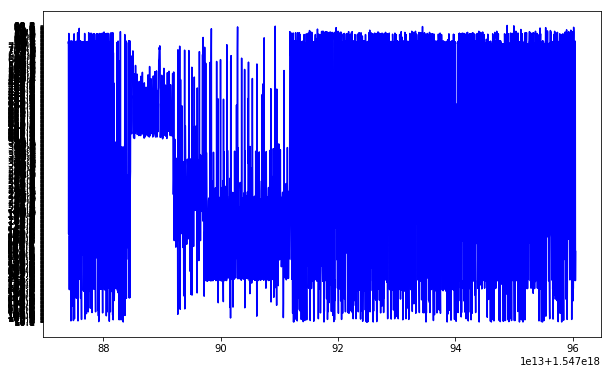

In [14]:
plt.figure(figsize=(10,6))  
plt.plot(data, color='blue', label='Actual entc')  
plt.show()  

In [15]:
diff = data.index.values[-1] - data.index.values[0]
days = diff.astype('timedelta64[D]')
days = days / np.timedelta64(1, 'D')
years = int(days/365)
print("Total data: %d years"%years)
print("80 percent data = 1980 to %d"%(1980 + int(0.8*years)))

Total data: 0 years
80 percent data = 1980 to 1980


In [16]:
split_date = pd.Timestamp('2019-01-19 21:40:30')
print(split_date)
print(type(split_date))

2019-01-19 21:40:30
<class 'pandas._libs.tslib.Timestamp'>


In [17]:
train = data.loc[split_date:]
train.shape

(2001, 1)

In [18]:
test = data.loc[:split_date]
test.shape

(884, 1)

In [19]:
train.head()

,entc
Date,
2019-01-19 21:40:30,8.8
2019-01-19 21:40:00,9.1
2019-01-19 21:39:30,19.5
2019-01-19 21:39:00,17.5
2019-01-19 21:38:30,8.7


In [20]:
test.head()

,entc
Date,
2019-01-20 05:02:00,151.7
2019-01-20 05:01:30,14.2
2019-01-20 05:01:00,8.5
2019-01-20 05:00:30,8.8
2019-01-20 05:00:00,8.0


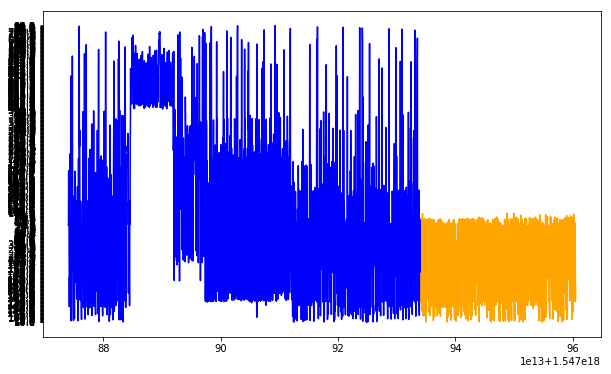

In [97]:
plt.figure(figsize=(10,6))

plt.plot(test, color='orange', label='Test data')  
plt.plot(train, color='blue', label='Train data')  
plt.show()  

In [22]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [23]:
train_sc_df = pd.DataFrame(train_sc, columns=['entc'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['entc'], index=test.index)

In [24]:
train_sc_df.head()
train_sc_df.shape

(2001, 1)

In [25]:
for s in range(1,2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['entc'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['entc'].shift(s)

In [26]:
train_sc_df.head()

,entc,X_1
Date,,
2019-01-19 21:40:30,0.001465,NaN
2019-01-19 21:40:00,0.001865,0.001465
2019-01-19 21:39:30,0.015717,0.001865
2019-01-19 21:39:00,0.013053,0.015717
2019-01-19 21:38:30,0.001332,0.013053


In [27]:
test_sc_df.head()

,entc,X_1
Date,,
2019-01-20 05:02:00,0.191795,NaN
2019-01-20 05:01:30,0.008657,0.191795
2019-01-20 05:01:00,0.001066,0.008657
2019-01-20 05:00:30,0.001465,0.001066
2019-01-20 05:00:00,0.000400,0.001465


In [28]:
train_sc_df.head()

,entc,X_1
Date,,
2019-01-19 21:40:30,0.001465,NaN
2019-01-19 21:40:00,0.001865,0.001465
2019-01-19 21:39:30,0.015717,0.001865
2019-01-19 21:39:00,0.013053,0.015717
2019-01-19 21:38:30,0.001332,0.013053


In [29]:
X_train = train_sc_df.dropna().drop('entc', axis=1)
y_train = train_sc_df.dropna().drop('X_1', axis=1)

In [30]:
X_train.head()

,X_1
Date,
2019-01-19 21:40:00,0.001465
2019-01-19 21:39:30,0.001865
2019-01-19 21:39:00,0.015717
2019-01-19 21:38:30,0.013053
2019-01-19 21:38:00,0.001332


In [31]:
y_train.head()

,entc
Date,
2019-01-19 21:40:00,0.001865
2019-01-19 21:39:30,0.015717
2019-01-19 21:39:00,0.013053
2019-01-19 21:38:30,0.001332
2019-01-19 21:38:00,0.004662


In [32]:
X_test = test_sc_df.dropna().drop('entc', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)

In [33]:
X_test.head()

,X_1
Date,
2019-01-20 05:01:30,0.191795
2019-01-20 05:01:00,0.008657
2019-01-20 05:00:30,0.001066
2019-01-20 05:00:00,0.001465
2019-01-20 04:59:30,0.000400


In [34]:
y_test.head()

,entc
Date,
2019-01-20 05:01:30,0.008657
2019-01-20 05:01:00,0.001066
2019-01-20 05:00:30,0.001465
2019-01-20 05:00:00,0.000400
2019-01-20 04:59:30,0.019979


In [35]:
X_train = X_train.as_matrix()
y_train = y_train.as_matrix()

In [36]:
X_train.shape

(2000, 1)

In [37]:
X_test = X_test.as_matrix()
y_test = y_test.as_matrix()

In [38]:
print('Train size: (%d x %d)'%(X_train.shape[0], X_train.shape[1]))
print('Test size: (%d x %d)'%(X_test.shape[0], X_test.shape[1]))

Train size: (2000 x 1)
Test size: (883 x 1)


In [40]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K

Using TensorFlow backend.


In [41]:
K.clear_session()
model = Sequential()
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu', kernel_initializer='lecun_uniform'))
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

In [42]:
model.fit(X_train, y_train, batch_size=64, epochs=20, verbose=1)

Epoch 1/20
2000/2000 [==============================] - 0s 78us/step - loss: 0.0234
Epoch 2/20
2000/2000 [==============================] - 0s 24us/step - loss: 0.0080
Epoch 3/20
2000/2000 [==============================] - 0s 26us/step - loss: 0.0076
Epoch 4/20
2000/2000 [==============================] - 0s 23us/step - loss: 0.0074
Epoch 5/20
2000/2000 [==============================] - 0s 25us/step - loss: 0.0072
Epoch 6/20
2000/2000 [==============================] - 0s 24us/step - loss: 0.0070
Epoch 7/20
2000/2000 [==============================] - 0s 29us/step - loss: 0.0068
Epoch 8/20
2000/2000 [==============================] - 0s 25us/step - loss: 0.0065
Epoch 9/20
2000/2000 [==============================] - 0s 26us/step - loss: 0.0065
Epoch 10/20
2000/2000 [==============================] - 0s 28us/step - loss: 0.0063
Epoch 11/20
2000/2000 [==============================] - 0s 25us/step - loss: 0.0062
Epoch 12/20
2000/2000 [==============================] - 0s 26us/step - lo

In [43]:
y_pred = model.predict(X_test)

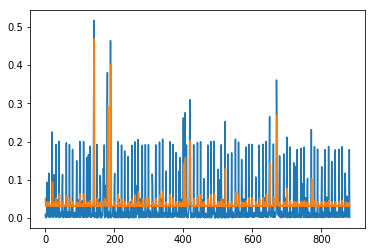

In [44]:
plt.plot(y_test)
plt.plot(y_pred)
#print('R-Squared: %f'%(r2_score(y_test, y_pred)))

In [45]:
test_sc_df.head()

,entc,X_1
Date,,
2019-01-20 05:02:00,0.191795,NaN
2019-01-20 05:01:30,0.008657,0.191795
2019-01-20 05:01:00,0.001066,0.008657
2019-01-20 05:00:30,0.001465,0.001066
2019-01-20 05:00:00,0.000400,0.001465


In [46]:
test_sc_df1 = test_sc_df.dropna()

In [47]:
test_sc_df1.head()

,entc,X_1
Date,,
2019-01-20 05:01:30,0.008657,0.191795
2019-01-20 05:01:00,0.001066,0.008657
2019-01-20 05:00:30,0.001465,0.001066
2019-01-20 05:00:00,0.000400,0.001465
2019-01-20 04:59:30,0.019979,0.000400


In [48]:
test_sc_df1['pred'] = pd.DataFrame(y_pred, columns=['pred'], index=test_sc_df1.index)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [49]:
test_sc_df1.head()

,entc,X_1,pred
Date,,,
2019-01-20 05:01:30,0.008657,0.191795,0.051276
2019-01-20 05:01:00,0.001066,0.008657,0.031575
2019-01-20 05:00:30,0.001465,0.001066,0.030237
2019-01-20 05:00:00,0.000400,0.001465,0.030382
2019-01-20 04:59:30,0.019979,0.000400,0.030030


In [50]:
test_sc_df2 = test_sc_df1.drop(['X_1'], axis=1)
test_sc_df2.head()

,entc,pred
Date,,
2019-01-20 05:01:30,0.008657,0.051276
2019-01-20 05:01:00,0.001066,0.031575
2019-01-20 05:00:30,0.001465,0.030237
2019-01-20 05:00:00,0.000400,0.030382
2019-01-20 04:59:30,0.019979,0.030030


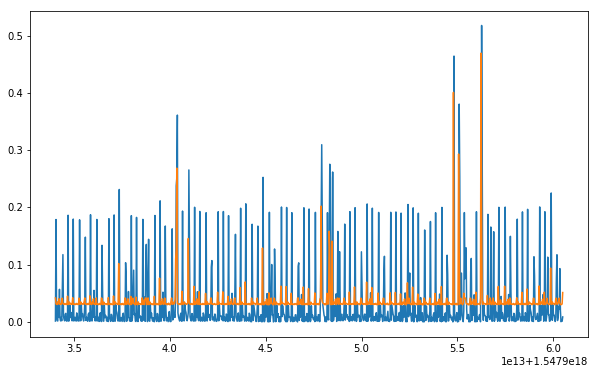

In [51]:
plt.figure(figsize=(10,6))

plt.plot(test_sc_df2)#, color='blue', label='Test data')  
#plt.plot(train, color='orange', label='Train data')  
plt.show()  

In [52]:
train_sc_df.head()

,entc,X_1
Date,,
2019-01-19 21:40:30,0.001465,NaN
2019-01-19 21:40:00,0.001865,0.001465
2019-01-19 21:39:30,0.015717,0.001865
2019-01-19 21:39:00,0.013053,0.015717
2019-01-19 21:38:30,0.001332,0.013053


In [55]:
train_sc_df1 = train_sc_df.drop(['X_1'], axis=1)

In [56]:
train_sc_df1.head()

,entc
Date,
2019-01-19 21:40:30,0.001465
2019-01-19 21:40:00,0.001865
2019-01-19 21:39:30,0.015717
2019-01-19 21:39:00,0.013053
2019-01-19 21:38:30,0.001332


In [60]:
len(train_sc_df1)

2001

In [61]:
len(y_pred)

883

In [ ]:
train_sc_df1['pred'] = pd.DataFrame(y_pred, columns=['pred'], index=test_sc_df1.index)

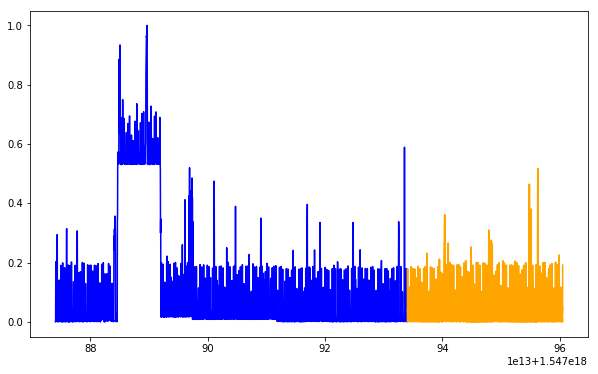

In [73]:
plt.figure(figsize=(10,6))

plt.plot(train_sc_df1, color='blue', label='Training data')  
plt.plot(test_sc_df1, color='orange', label='Prediction data')  
plt.show()  

In [64]:
y_pred_cs = sc.inverse_transform(y_pred)

In [65]:
print(y_pred_cs)

[[  46.19823074]
 [  31.40679741]
 [  30.40221786]
 [  30.51091576]
 [  30.24682808]
 [  32.4970665 ]
 [  38.84379196]
 [  32.86564636]
 [  33.4670105 ]
 [  31.40679741]
 [  30.71385384]
 [  38.75018692]
 [  38.46224213]
 [  31.35197449]
 [  30.30429077]
 [  31.09413147]
 [  31.6396656 ]
 [  31.62412071]
 [  33.9274292 ]
 [  30.77283859]
 [  34.86999512]
 [  78.27891541]
 [  30.90791321]
 [  30.61961365]
 [  30.40221786]
 [  31.69147682]
 [  31.66557121]
 [  38.66827393]
 [  34.1787796 ]
 [  31.44565773]
 [  30.47468376]
 [  30.71385384]
 [  46.71078873]
 [  31.43270302]
 [  30.43844986]
 [  37.37882614]
 [  31.66038895]
 [  31.65520859]
 [  33.8227005 ]
 [  30.77283859]
 [  30.67453384]
 [  54.79531097]
 [  30.40221786]
 [  30.71385384]
 [  30.36598587]
 [  31.75990868]
 [  31.51041794]
 [  31.00818825]
 [  30.90791321]
 [  31.47155952]
 [  38.57584   ]
 [  38.68148422]
 [  30.30429077]
 [  31.43270302]
 [  30.36598587]
 [  31.16575623]
 [  31.93449783]
 [  32.5552597 ]
 [  33.8017501

In [79]:
train_cs = sc.inverse_transform(train_sc_df1) 

In [85]:
train_cs.shape

(2001, 1)

In [89]:
## transform to DF
train_cs_df = pd.DataFrame(train_cs, columns=['entc'], index=train_sc_df1.index)

In [94]:
train_cs_df.head()
train_cs_df.shape

(2001, 1)

In [92]:
## transform to DF
test_cs_df = pd.DataFrame(y_pred_cs, columns=['predictions'], index=test_sc_df1.index)

In [93]:
test_cs_df.head()

,predictions
Date,
2019-01-20 05:01:30,46.198231
2019-01-20 05:01:00,31.406797
2019-01-20 05:00:30,30.402218
2019-01-20 05:00:00,30.510916
2019-01-20 04:59:30,30.246828


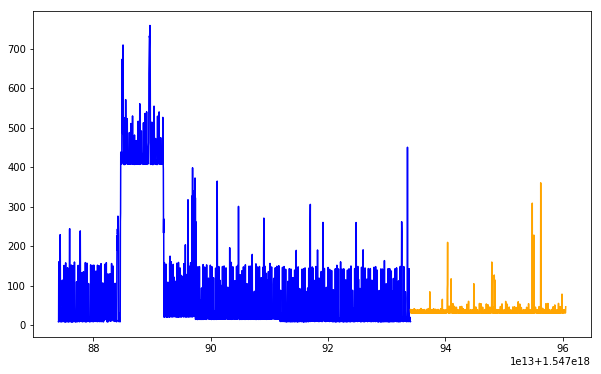

In [96]:
plt.figure(figsize=(10,6))

plt.plot(train_cs_df, color='blue', label='Training data')  
plt.plot(test_cs_df, color='orange', label='Prediction data')  
plt.show() 

In [118]:
train_dates = train_cs_df.index.values

In [119]:
print(train_dates)

['2019-01-19T21:40:30.000000000' '2019-01-19T21:40:00.000000000'
 '2019-01-19T21:39:30.000000000' ..., '2019-01-19T05:01:30.000000000'
 '2019-01-19T05:01:00.000000000' '2019-01-19T05:00:30.000000000']


In [123]:
datetime.strptime('2019-01-19T21:40:30.000000000', '%Y-%m-%d:%H:%M')

ValueError: time data '2019-01-19T21:40:30.000000000' does not match format '%Y-%m-%d:%H:%M'

In [117]:
from datetime import datetime
myDates1 = [datetime.strptime(d,'%m/%d/%Y').date() for i in train_dates]

TypeError: strptime() argument 1 must be str, not numpy.datetime64

In [121]:
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

myDates = [i for i in train_dates]
myValues = train_cs_df

fig, ax = plt.subplots()
ax.plot(myDates,myValues)

myFmt = DateFormatter("%d")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()
plt.show()

OverflowError: signed integer is greater than maximum

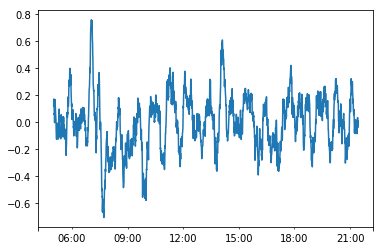

In [124]:
#dates = pd.date_range('2017-01-01', '2017-03-06', freq='H', tz='UTC')
sr = pd.Series(np.random.randn(len(train_dates)), index=dates)
sr.rolling(30).mean().plot()  # Give us a 30 hour rolling mean


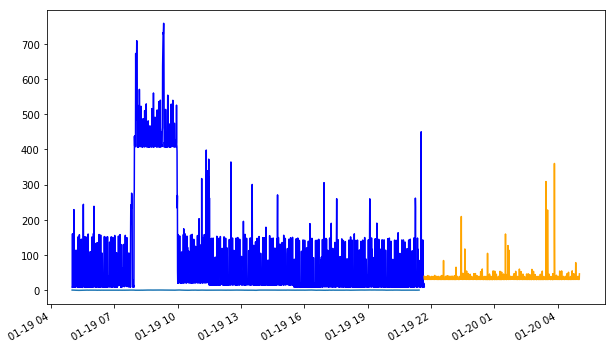

In [126]:
plt.figure(figsize=(10,6))

plt.plot(train_cs_df, color='blue', label='Training data')  
plt.plot(test_cs_df, color='orange', label='Prediction data') 
sr = pd.Series(np.random.randn(len(train_dates)), index=dates)
sr.rolling(30).mean().plot()  # Give us a 30 hour rolling mean

plt.show()